# Example of dataset using time series from EcoDatacube (landsat composites)

This is an example code of how tu use provided data providers and dataset to create a pytorch dataset based on time series data.

## Imports
Importing the providers and dataset objects:

In [1]:
from data.GLC23TimeSeriesProviders import MultipleCSVTimeSeriesProvider, CSVTimeSeriesProvider
from data.GLC23Datasets import TimeSeriesDataset

## Providers

Define the list of providers: Providers are datareaders specific to any GLC23 time series. ``CSVTimeSeriesProvider`` allows to find and load a time series from a 'timeSerieID', ``MultipleCSVTimeSeriesProvider`` allows to read in one or multiple time series, based on a selection of spectral bands in `['red', 'green', 'blue', 'ir', 'swir1', 'swir2']`. You need to configure the list of providers for the data you want to include in the tensor.

In [2]:
data_path = 'data/sample_data/' # root path of the data
# configure providers
ts_red = CSVTimeSeriesProvider(data_path+'SatelliteTimeSeries/time_series_red.csv')
ts_multi = MultipleCSVTimeSeriesProvider(data_path+'SatelliteTimeSeries/', select=['red', 'blue'])
ts_all = MultipleCSVTimeSeriesProvider(data_path+'SatelliteTimeSeries/')

In [3]:
ts_red

-------------------------------------------------- 
nb_layers: 1
min_sequence: 71
max_sequence: 85
bands_names: ['time_series_red']
--------------------------------------------------

In [4]:
ts_multi

-------------------------------------------------- 
nb_layers: 2
min_sequence: 71
max_sequence: 85
bands_names: ['time_series_blue', 'time_series_red']
--------------------------------------------------

In [5]:
ts_all

-------------------------------------------------- 
nb_layers: 6
min_sequence: 71
max_sequence: 85
bands_names: ['time_series_blue', 'time_series_green', 'time_series_nir', 'time_series_red', 'time_series_swir1', 'time_series_swir2']
--------------------------------------------------

## Dataset

Construct the dataset object given the list of providers and the occurrences csv file: The ``TimeSeriesDataset`` class inherits from the ``Dataset`` class of ``torch.utils.data``.

In [8]:
# create dataset
dataset = TimeSeriesDataset(occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv',
                            providers=[ts_all])


## Examples of time series

After construction the ``TimeSeriesDataset`` can return a tensor given an index of data.
Testing the dataset on random occurrences from the sample data:

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 6, 84]), label: 7746


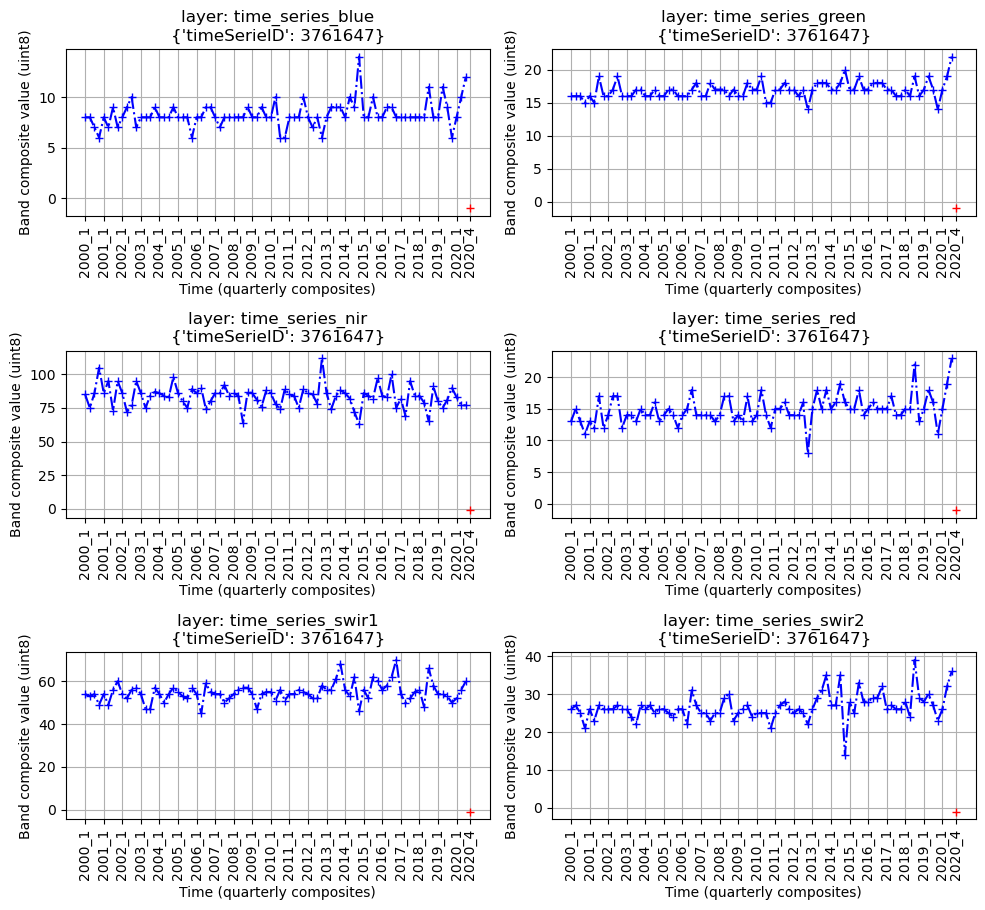

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 6, 84]), label: 8126


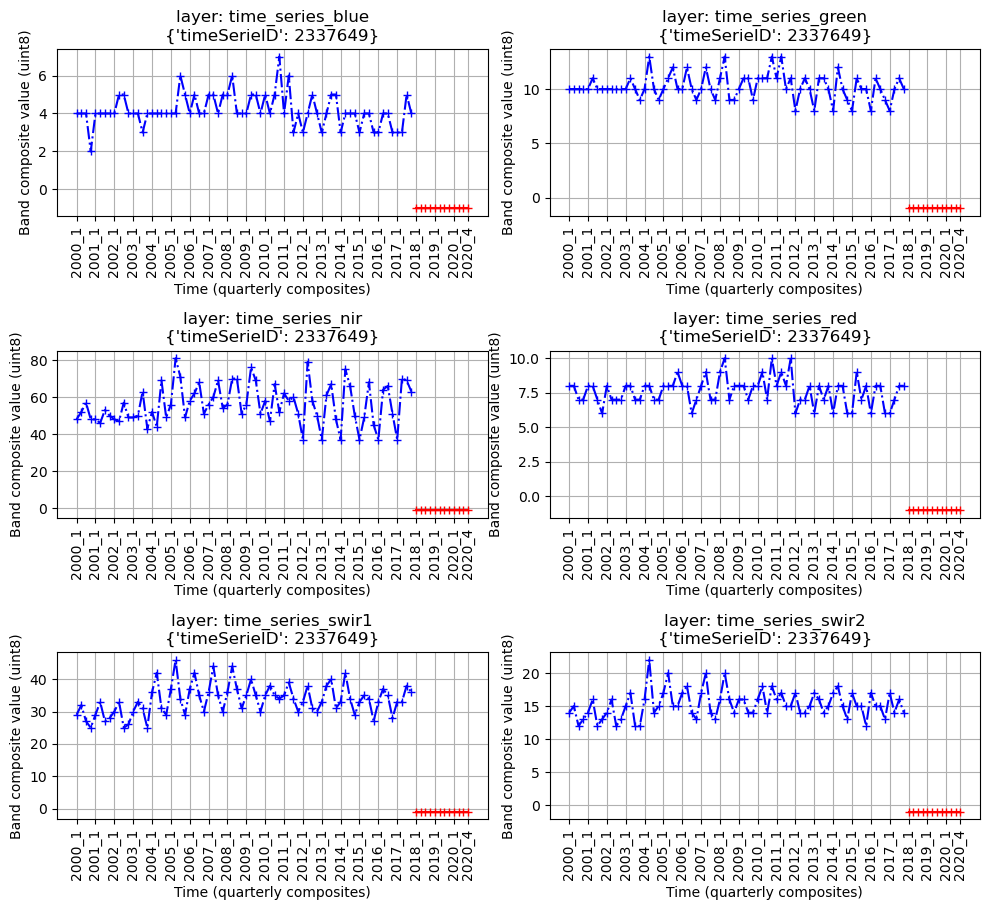

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 6, 84]), label: 1131


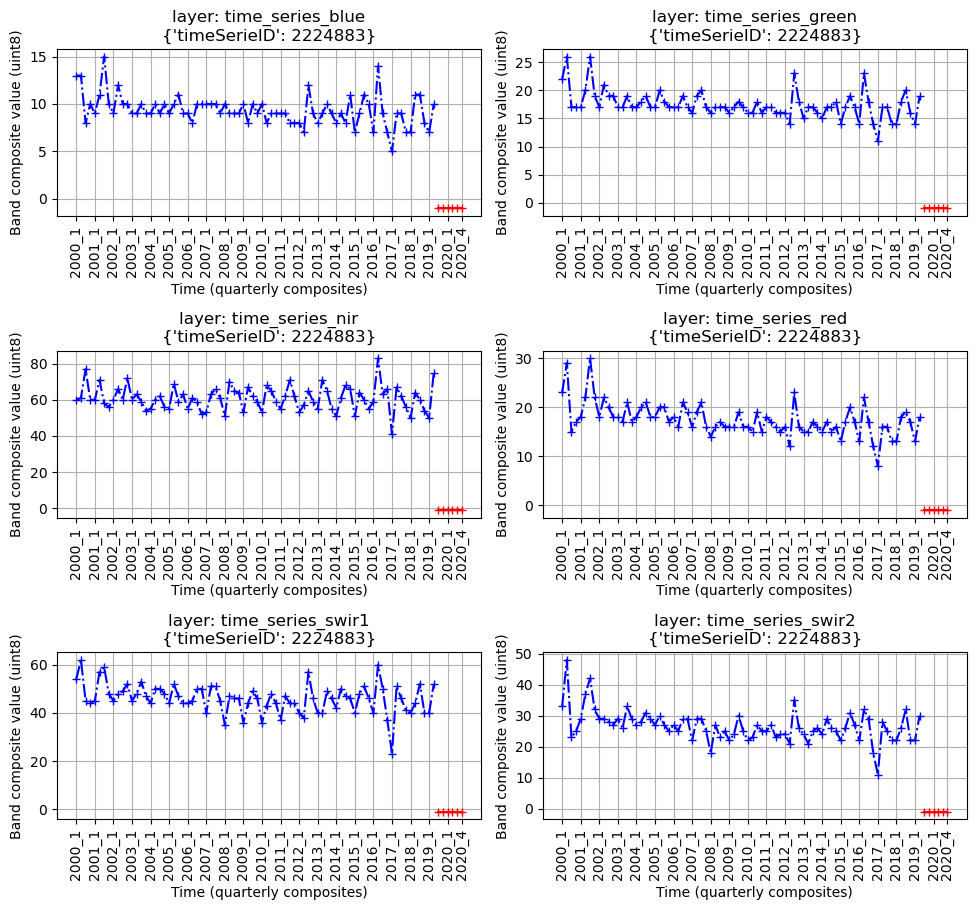

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 6, 84]), label: 7740


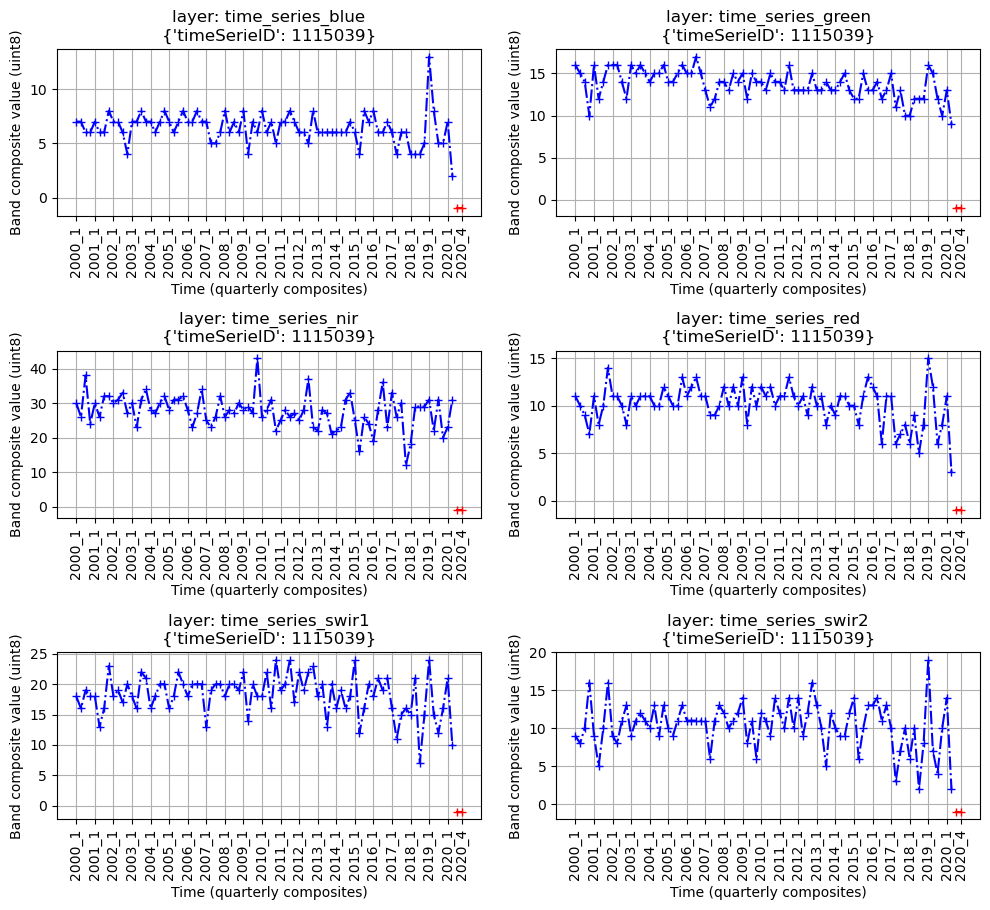

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 6, 84]), label: 8126


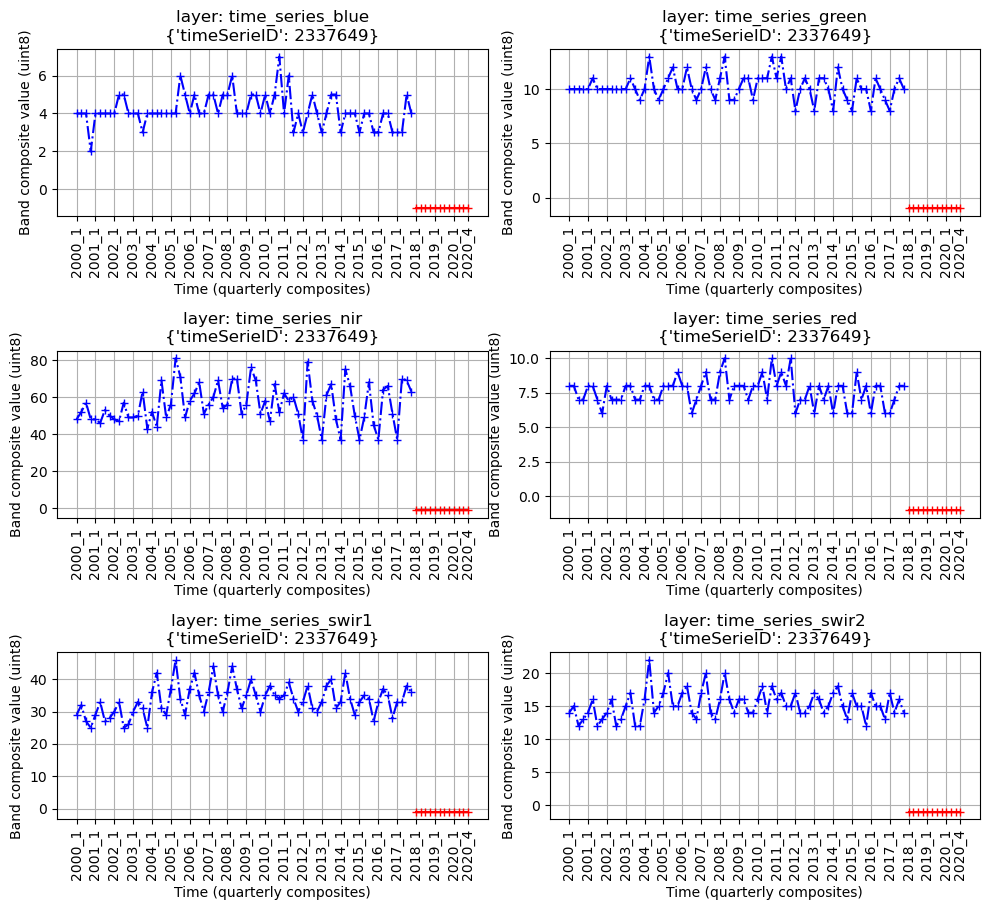

In [9]:
import random

# print random tensors from dataset
ids = [random.randint(0, len(dataset)-1) for i in range(5)]
for id in ids:
    tensor = dataset[id][0]
    label = dataset[id][1]
    print('Tensor type: {}, tensor shape: {}, label: {}'.format(type(tensor), tensor.shape, label))
    dataset.plot_ts(id)

## Torch dataloader

The ``TimeSeriesDataset`` can be then wrapped in a torch dataloader:

In [10]:
import torch

train_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=64,  num_workers=8)

first_batch_tensor, first_batch_labels = next(iter(train_loader))
print(first_batch_tensor)
print(first_batch_tensor.shape)

tensor([[[[140.,  11.,   9.,  ..., 202.,   9.,  -1.],
          [159.,  22.,  19.,  ..., 214.,  20.,  -1.],
          [205.,  69.,  86.,  ..., 192.,  81.,  -1.],
          [176.,  23.,  19.,  ..., 221.,  22.,  -1.],
          [ 31.,  61.,  56.,  ...,   3.,  55.,  -1.],
          [ 16.,  34.,  28.,  ...,  23.,  29.,  -1.]]],


        [[[  4.,   5.,   5.,  ...,   5.,  -1.,  -1.],
          [ 12.,  13.,  13.,  ...,  13.,  -1.,  -1.],
          [ 64.,  82.,  78.,  ...,  64.,  -1.,  -1.],
          [  9.,   9.,  10.,  ...,  10.,  -1.,  -1.],
          [ 37.,  41.,  39.,  ...,  42.,  -1.,  -1.],
          [ 17.,  16.,  17.,  ...,  19.,  -1.,  -1.]]],


        [[[ 27.,  30.,  33.,  ...,  24.,  27.,  -1.],
          [ 41.,  46.,  50.,  ...,  38.,  41.,  -1.],
          [ 89.,  87.,  85.,  ...,  80.,  80.,  -1.],
          [ 45.,  52.,  58.,  ...,  43.,  47.,  -1.],
          [ 73.,  85.,  95.,  ...,  80.,  84.,  -1.],
          [ 47.,  60.,  72.,  ...,  49.,  52.,  -1.]]],


        ...,


 